## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
#observe the different feature type present in the data
df0 = df[df["Class"]==0]
df1 = df[df["Class"]==1]

In [5]:
cols = df0.columns

In [6]:
cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

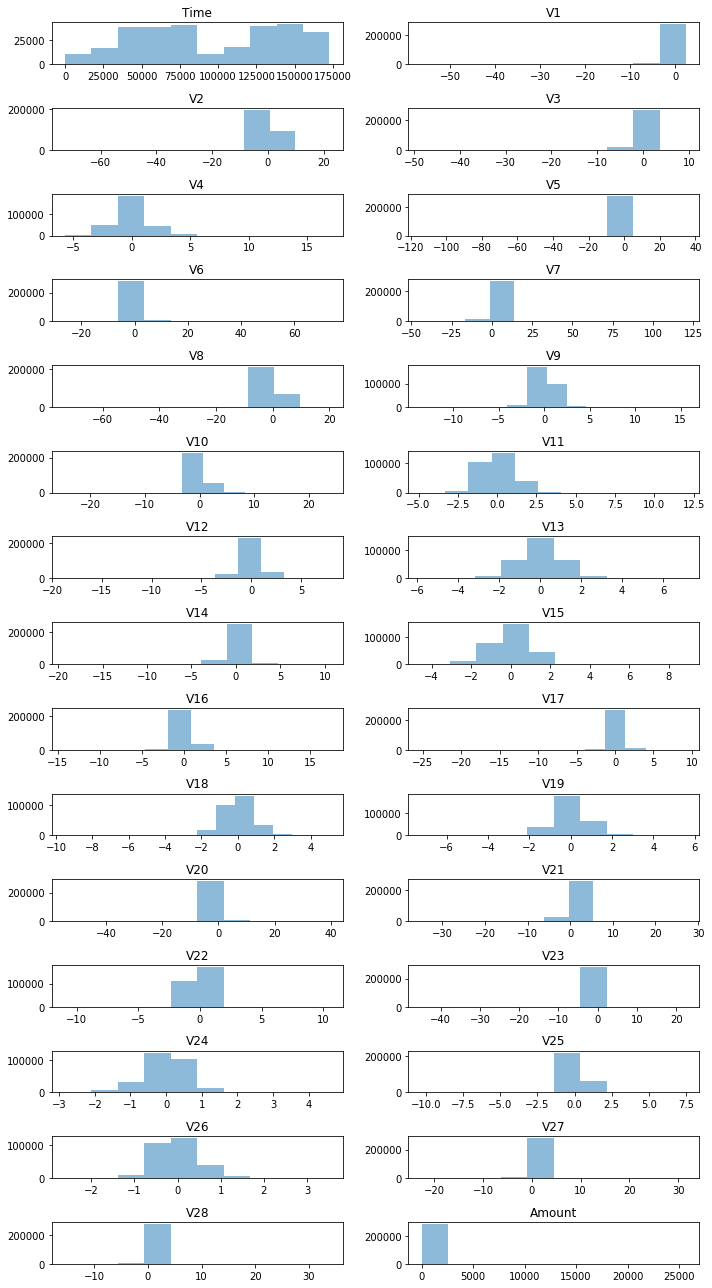

In [7]:
fig,axes = plt.subplots(15,2,figsize=(10,18))

for col,ax in zip(cols,axes.ravel()):
    ax.hist(df0[col],label="_0",alpha=.5)
    ax.hist(df1[col],label="_1",alpha=.5)
    ax.set_title(col)
plt.tight_layout()


Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

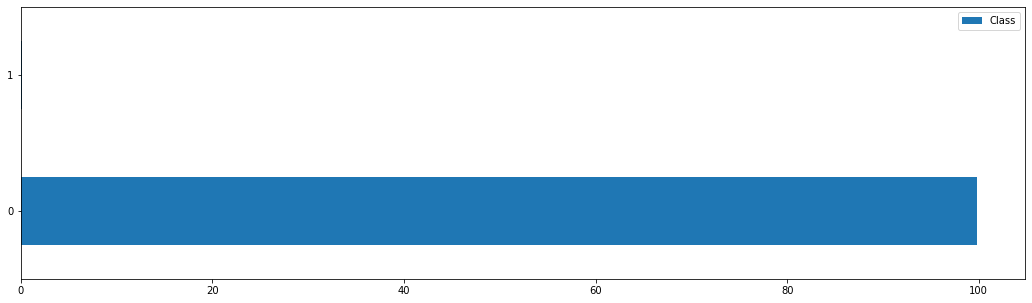

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
(classes/len(df)*100).plot(kind="barh",figsize=(18,5))
plt.legend()

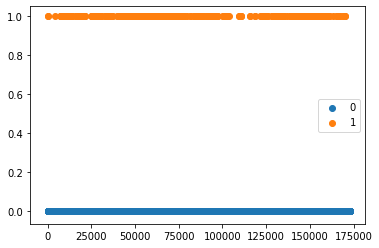

In [10]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df0["Time"],df0["Class"],label="0")
plt.scatter(df1["Time"],df1["Class"],label="1")
plt.legend()

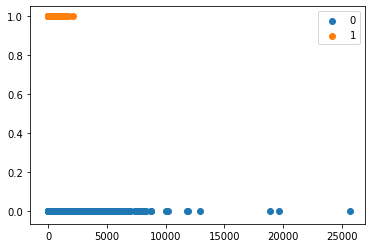

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df0["Amount"],df0["Class"],label="0")
plt.scatter(df1["Amount"],df1["Class"],label="1")
plt.legend()
plt.show()

In [1]:
# Drop unnecessary columns
#Its not too many and model will ignore it 

### Splitting the data into train & test data

In [13]:
y= df["Class"]

In [14]:
X = df[cols]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
323
169


### Plotting the distribution of a variable

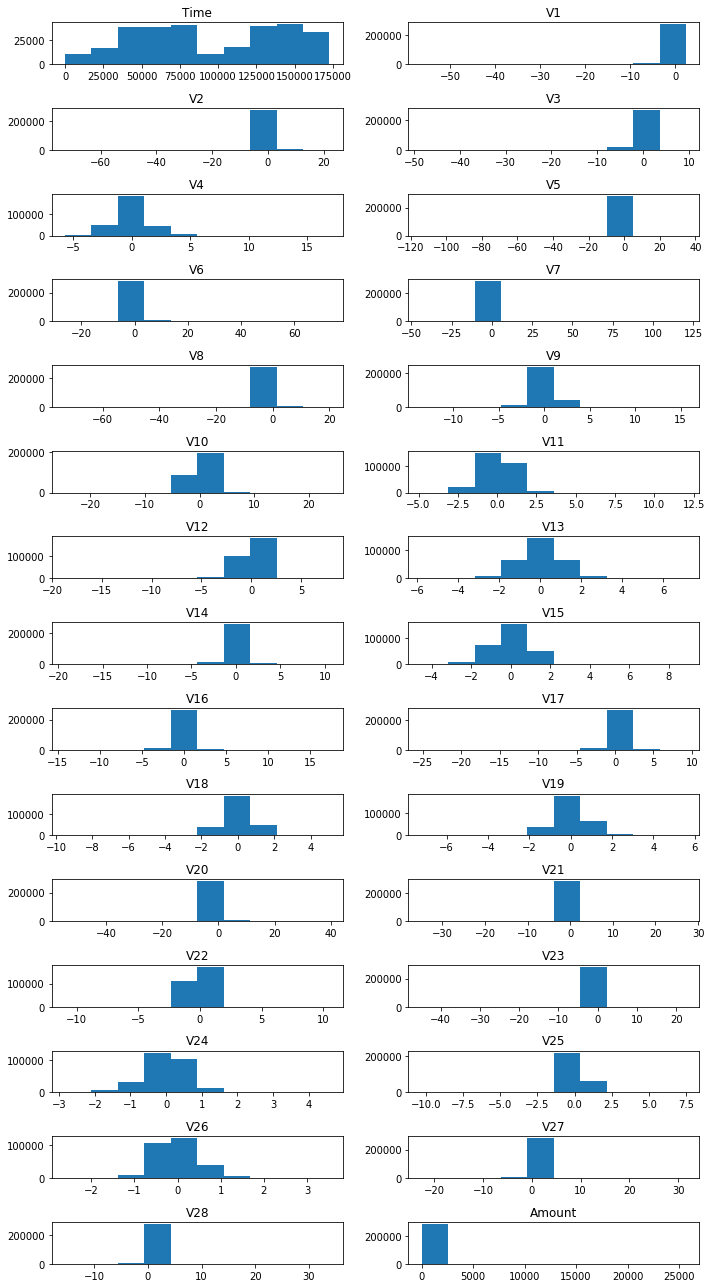

In [18]:
# plot the histogram of a variable from the dataset to see the skewness
fig,axes = plt.subplots(15,2,figsize=(10,18))
for col,ax in zip(cols,axes.ravel()):
    ax.hist(df[col])
    ax.set_title(col)
plt.tight_layout()

### Power transformed to make distribution normal
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
pt = preprocessing.PowerTransformer(copy=False) #to fit & transform the train & test data

In [20]:
X_train_pt = pt.fit_transform(X_train)

In [21]:
X_test_pt = pt.transform(X_test)

In [22]:

X_train_pt_df = pd.DataFrame(data=X_train_pt,columns=cols)

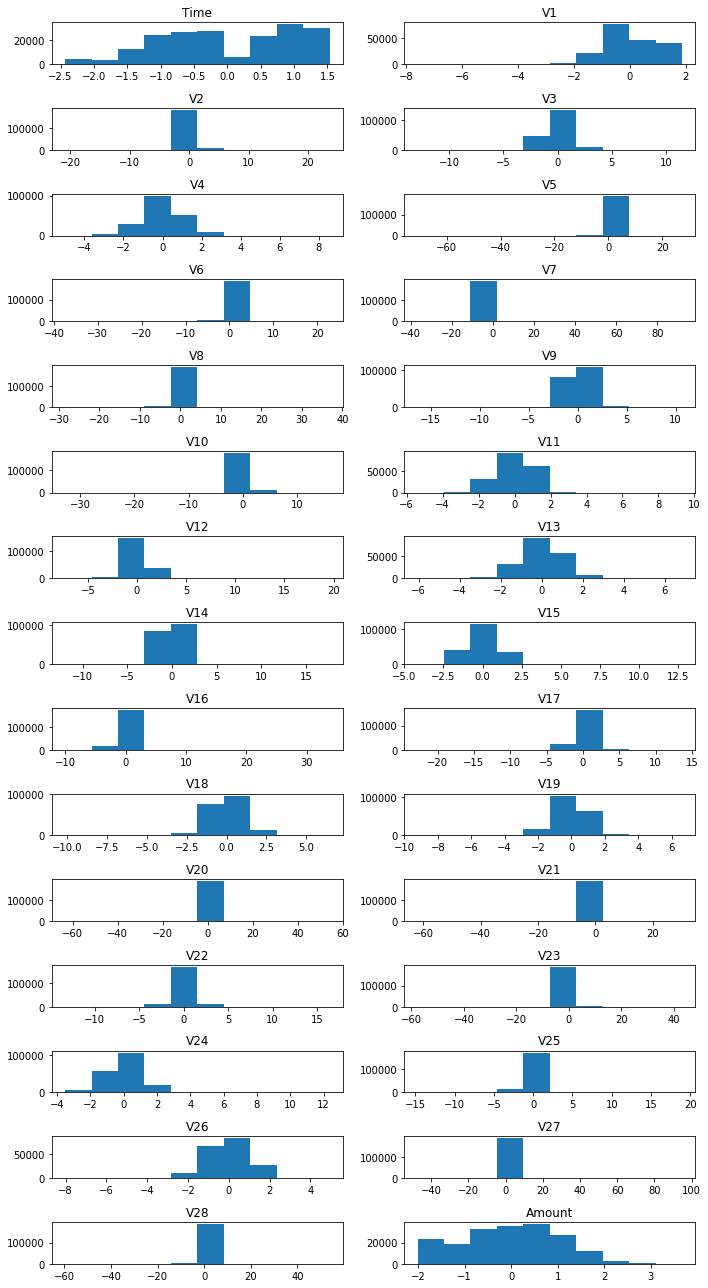

In [23]:
# plot the histogram of a variables/features of the dataset again to see the result of power transform
#For example feature v17 looks more normal after power transformed
fig,axes = plt.subplots(15,2,figsize=(10,18))
for col,ax in zip(cols,axes.ravel()):
    ax.hist(X_train_pt_df[col],label="train")
    
    ax.set_title(col)
plt.tight_layout()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression



In [24]:
logreg = LogisticRegression(class_weight="balanced",C=100)

In [25]:
logreg.fit(X_train_pt,y_train)

C:\Users\c.a.singh\AN\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print(metrics.classification_report(y_train,logreg.predict_proba(X_train_pt)[:,1]>.32))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    190497
           1       0.03      0.95      0.06       323

    accuracy                           0.95    190820
   macro avg       0.52      0.95      0.52    190820
weighted avg       1.00      0.95      0.97    190820



In [27]:
print(metrics.classification_report(y_test,logreg.predict_proba(X_test_pt)[:,1]>.32))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     93818
           1       0.03      0.92      0.06       169

    accuracy                           0.95     93987
   macro avg       0.52      0.93      0.52     93987
weighted avg       1.00      0.95      0.97     93987



In [28]:
metrics.confusion_matrix(y_test,logreg.predict_proba(X_test_pt)[:,1]>.32)

array([[89140,  4678],
       [   14,   155]], dtype=int64)

In [29]:
print(metrics.classification_report(y_test,logreg.predict_proba(X_test_pt)[:,1]>.32)) # Cut Off set based on Sensit Vs Speci

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     93818
           1       0.03      0.92      0.06       169

    accuracy                           0.95     93987
   macro avg       0.52      0.93      0.52     93987
weighted avg       1.00      0.95      0.97     93987



In [30]:
sen0=[]
sen1=[]

for prob in np.linspace(.001,.5,100):
    cf = metrics.confusion_matrix(y_train,logreg.predict_proba(X_train_pt)[:,1]>prob)
    sensitivity0 = cf[0,0]/(cf[0,0]+cf[0,1])
    sensitivity1= cf[1,1]/(cf[1,1]+cf[1,0])
    sen0.append(sensitivity0)
    sen1.append(sensitivity1)

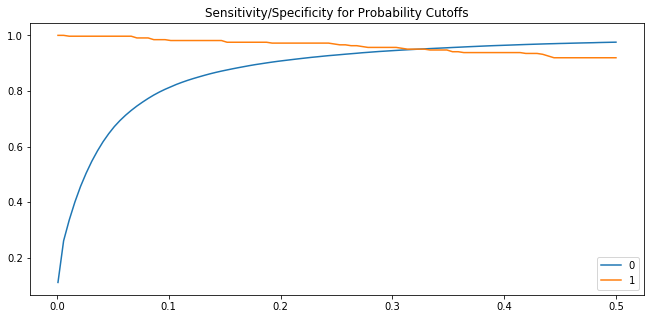

In [31]:
plt.figure(figsize=(11,5))
plt.plot(np.linspace(.001,.5,100),sen0,label="0")
plt.plot(np.linspace(.001,.5,100),sen1,label="1")
plt.legend()
plt.title("Sensitivity/Specificity for Probability Cutoffs")
plt.show()

In [32]:
metrics.roc_auc_score(y_train,logreg.predict_proba(X_train_pt)[:,1]>.32)

0.9500428250814217

In [33]:
metrics.roc_auc_score(y_test,logreg.predict_proba(X_test_pt)[:,1]>.32)

0.9336486317900413

#### perfom cross validation on the X_train & y_train to create a fine tuned model and then tweaking threshold using predict_proba


In [26]:
#perform cross validation
#perform hyperparameter tuning
#print the evaluation result by choosing a evaluation metric
#print the optimum value of hyperparameters
from sklearn.model_selection import GridSearchCV

In [35]:

param_grid = {'C':[0.1,1,10,100]}
grid =GridSearchCV(logreg,param_grid,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)
grid.fit(X_train_pt,y_train)


C:\Users\c.a.singh\AN\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=100, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [36]:
dfvt = pd.DataFrame(grid.cv_results_)

In [37]:
dfvt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.488798,0.259374,0.056632,0.009098,0.1,{'C': 0.1},0.972613,0.993588,0.966512,0.977571,0.011596,1,0.990630,0.987770,0.996211,0.991537,0.003505
1,4.941531,0.202075,0.073482,0.003721,1,{'C': 1},0.971987,0.993530,0.966398,0.977305,0.011698,2,0.990821,0.987810,0.996209,0.991613,0.003474
2,5.397408,0.683341,0.074533,0.004500,10,{'C': 10},0.971960,0.993525,0.966386,0.977290,0.011703,3,0.990843,0.987815,0.996207,0.991622,0.003470
3,5.249888,0.595775,0.064181,0.009909,100,{'C': 100},0.971958,0.993525,0.966384,0.977289,0.011704,4,0.990845,0.987815,0.996207,0.991622,0.003470


In [38]:
dfvt[dfvt["mean_train_score"]==dfvt["mean_train_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
3,5.249888,0.595775,0.064181,0.009909,100,{'C': 100},0.971958,0.993525,0.966384,0.977289,0.011704,4,0.990845,0.987815,0.996207,0.991622,0.00347


In [66]:
# C=100 giving the best mean_train_accuracy hence using it for model as per above data frame but precision is 3% very low

### Other algorithms tried as below

- Random Forest
- XGBoost

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=150,class_weight="balanced",min_samples_split=4,criterion='entropy')

In [53]:
rf.fit(X_train_pt,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [54]:
metrics.confusion_matrix(y_test,rf.predict(X_test_pt))

array([[93811,     7],
       [   45,   124]], dtype=int64)

In [55]:
print(metrics.classification_report(y_test,rf.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.95      0.73      0.83       169

    accuracy                           1.00     93987
   macro avg       0.97      0.87      0.91     93987
weighted avg       1.00      1.00      1.00     93987



In [25]:
# Grid Search applied to fine optimal parameters

In [49]:
param_grid_rf = {'criterion':['gini','entropy'],'n_estimators':[100,150,200],'min_samples_split':[2,4,6]}
gridrf =GridSearchCV(rf,param_grid_rf,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)
gridrf.fit(X_train_pt,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [50]:
dfcvrf = pd.DataFrame(gridrf.cv_results_)

In [51]:
dfcvrf[dfcvrf["mean_train_score"]==dfcvrf["mean_train_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,136.011805,7.023894,1.309575,0.102193,gini,2,100,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.933213,0.975808,0.923469,0.944163,0.022727,15,1.0,1.0,1.0,1.0,0.000000e+00
1,207.392267,10.508969,1.816073,0.053669,gini,2,150,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.941947,0.980626,0.927984,0.950186,0.022267,9,1.0,1.0,1.0,1.0,6.409876e-17
2,274.990406,15.735288,2.516105,0.147893,gini,2,200,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.946298,0.975358,0.936598,0.952751,0.016468,6,1.0,1.0,1.0,1.0,0.000000e+00
9,89.252089,6.008545,0.690820,0.041954,entropy,2,100,"{'criterion': 'entropy', 'min_samples_split': ...",0.928782,0.966734,0.923315,0.939611,0.019309,18,1.0,1.0,1.0,1.0,0.000000e+00
10,133.268551,10.446974,0.964421,0.023304,entropy,2,150,"{'criterion': 'entropy', 'min_samples_split': ...",0.923651,0.980340,0.923085,0.942359,0.026858,17,1.0,1.0,1.0,1.0,0.000000e+00
11,178.236994,12.114552,1.241347,0.049146,entropy,2,200,"{'criterion': 'entropy', 'min_samples_split': ...",0.945890,0.984679,0.932118,0.954229,0.022254,4,1.0,1.0,1.0,1.0,0.000000e+00
13,129.698085,8.279002,0.944141,0.033281,entropy,4,150,"{'criterion': 'entropy', 'min_samples_split': ...",0.946596,0.984757,0.932190,0.954515,0.022179,3,1.0,1.0,1.0,1.0,0.000000e+00
14,177.395794,10.202129,1.210097,0.052328,entropy,4,200,"{'criterion': 'entropy', 'min_samples_split': ...",0.927450,0.979847,0.945758,0.951019,0.021712,8,1.0,1.0,1.0,1.0,0.000000e+00


# Using fine tuned model with optimal parameters after Cross Validation to tweak threshold using predict proba 

In [56]:
#initialise the model with optimum hyperparameters as below based on grid search
clf = RandomForestClassifier(n_estimators=150,class_weight="balanced",min_samples_split=4,criterion='entropy')

In [57]:
clf.fit(X_train_pt, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [60]:
sen0=[]
sen1=[]
for prob in np.linspace(.001,1,100):
    cf = metrics.confusion_matrix(y_train,clf.predict_proba(X_train_pt)[:,1]>prob)
    sensitivity0 = cf[0,0]/(cf[0,0]+cf[0,1])
    sensitivity1= cf[1,1]/(cf[1,1]+cf[1,0])
    sen0.append(sensitivity0)
    sen1.append(sensitivity1)

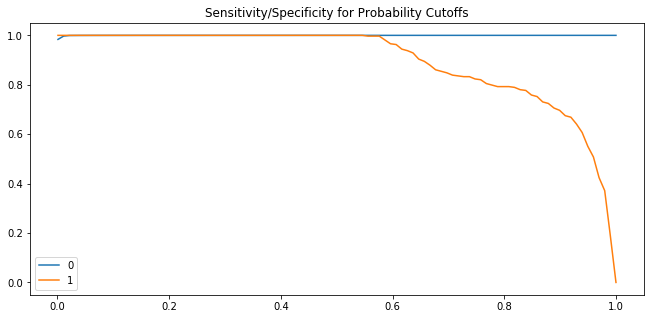

In [61]:
plt.figure(figsize=(11,5))
plt.plot(np.linspace(.001,1,100),sen0,label="0")
plt.plot(np.linspace(.001,1,100),sen1,label="1")
plt.legend()
plt.title("Sensitivity/Specificity for Probability Cutoffs")
plt.show()

In [100]:
print(metrics.classification_report(y_train,clf.predict_proba(X_train_pt)[:,1]>.10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       0.91      1.00      0.95       323

    accuracy                           1.00    190820
   macro avg       0.95      1.00      0.98    190820
weighted avg       1.00      1.00      1.00    190820



In [101]:
print(metrics.classification_report(y_test,clf.predict_proba(X_test_pt)[:,1]>.10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.82      0.85      0.83       169

    accuracy                           1.00     93987
   macro avg       0.91      0.92      0.92     93987
weighted avg       1.00      1.00      1.00     93987



In [102]:
metrics.confusion_matrix(y_test,clf.predict_proba(X_test_pt)[:,1]>.10)

array([[93786,    32],
       [   26,   143]], dtype=int64)

In [103]:
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric
metrics.roc_auc_score(y_test,clf.predict_proba(X_test_pt)[:,1]>.10)

0.9229063801107547

In [104]:
# Random forest has very good precision 80% more over logistic regression but 7% less recall than logistic regression 

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 15
2nd Top var = 18
3rd Top var = 13


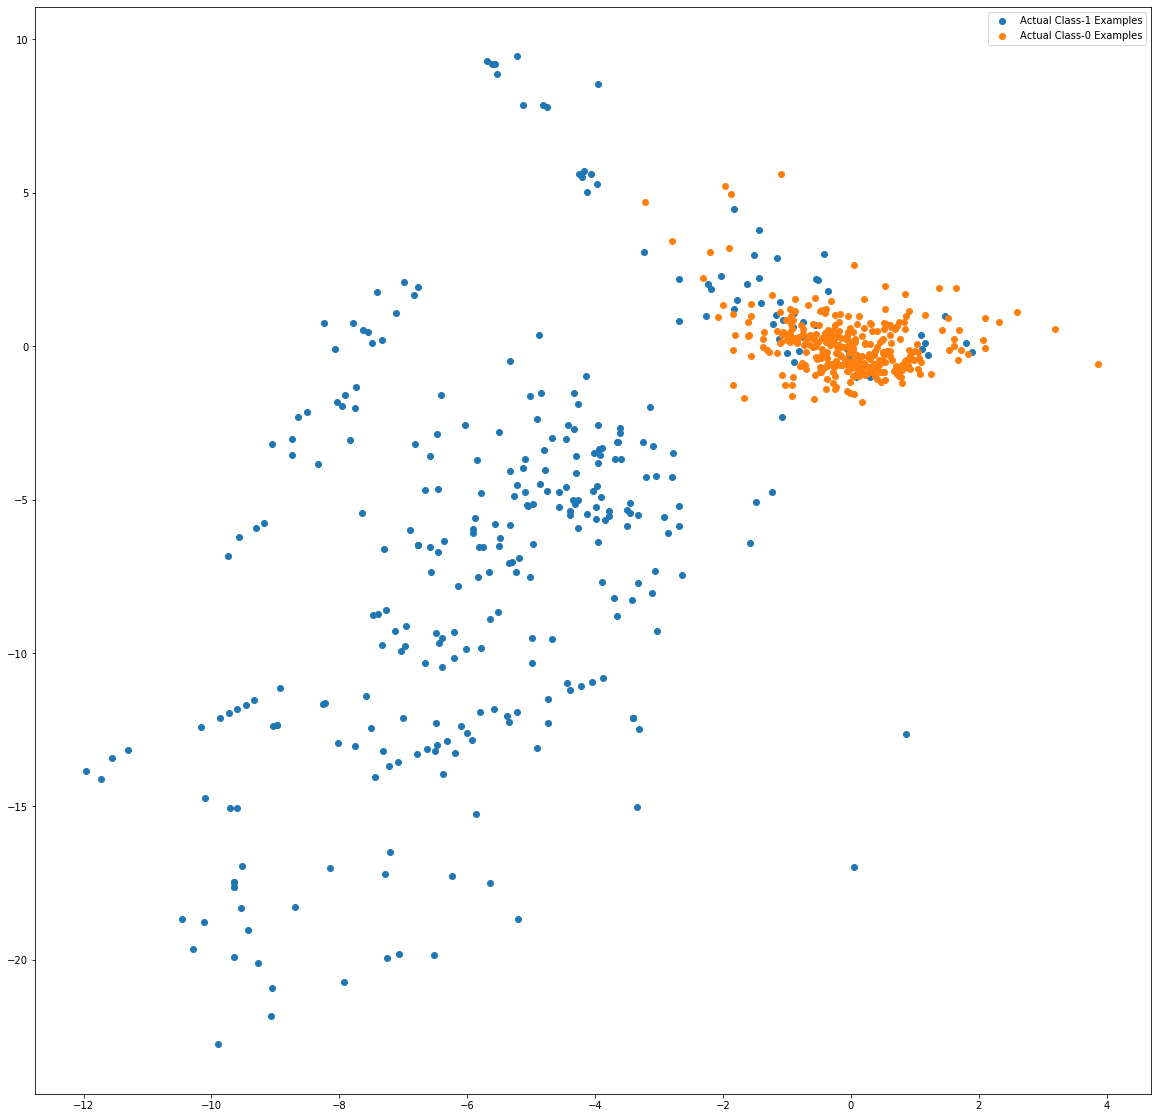

In [105]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [26]:
#!pip install xgboost

In [25]:
import xgboost as xgb

In [28]:
xgm=xgb.XGBClassifier(random_state=1,learning_rate=0.01)

In [29]:
xgm.fit(X_train_pt, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print(metrics.confusion_matrix(y_train,xgm.predict(X_train_pt)))

[[190490      7]
 [    52    271]]


In [33]:
print(metrics.classification_report(y_train,xgm.predict(X_train_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       0.97      0.84      0.90       323

    accuracy                           1.00    190820
   macro avg       0.99      0.92      0.95    190820
weighted avg       1.00      1.00      1.00    190820



In [35]:
print(metrics.classification_report(y_test,xgm.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.90      0.76      0.83       169

    accuracy                           1.00     93987
   macro avg       0.95      0.88      0.91     93987
weighted avg       1.00      1.00      1.00     93987



In [36]:
print(metrics.confusion_matrix(y_test,xgm.predict(X_test_pt)))

[[93804    14]
 [   40   129]]


In [40]:
param_grid_xg = {"learning_rate":[0.001,.01,1]}

In [43]:
gridx = GridSearchCV(xgm,param_grid=param_grid_xg,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)

In [44]:
gridx.fit(X_train_pt,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                   

In [45]:
dfcvxg = pd.DataFrame(gridx.cv_results_)

In [46]:
dfcvxg[dfcvxg["mean_train_score"]==dfcvxg["mean_train_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,91.493938,13.77502,0.632887,0.148535,1,{'learning_rate': 1},0.964945,0.985623,0.952103,0.967557,0.013809,1,1.0,1.0,1.0,1.0,0.0


# Using fine tuned model with optimal parameters after Cross Validation to tweak threshold using predict proba : XGB

In [26]:
clxg = xgb.XGBClassifier(random_state=1,learning_rate=1) # Fitting the model with best learnig rate of 1

In [48]:
clxg.fit(X_train_pt,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
print(metrics.classification_report(y_train,clxg.predict(X_train_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       1.00      1.00      1.00       323

    accuracy                           1.00    190820
   macro avg       1.00      1.00      1.00    190820
weighted avg       1.00      1.00      1.00    190820



In [50]:
print(metrics.classification_report(y_test,clxg.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.96      0.76      0.85       169

    accuracy                           1.00     93987
   macro avg       0.98      0.88      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [52]:
sen0=[]
sen1=[]

for prob in np.linspace(.001,.5,100):
    cf = metrics.confusion_matrix(y_train,clxg.predict_proba(X_train_pt)[:,1]>prob)
    sensitivity0 = cf[0,0]/(cf[0,0]+cf[0,1])
    sensitivity1= cf[1,1]/(cf[1,1]+cf[1,0])
    sen0.append(sensitivity0)
    sen1.append(sensitivity1)

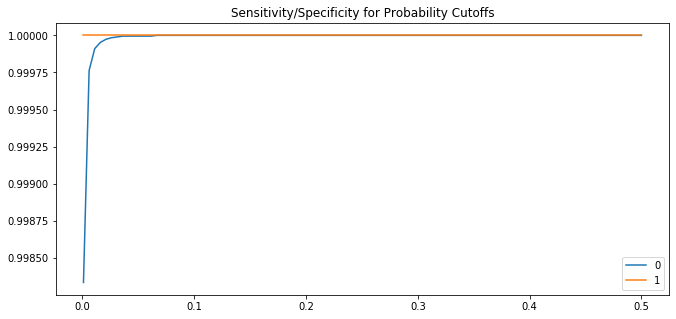

In [53]:
plt.figure(figsize=(11,5))
plt.plot(np.linspace(.001,.5,100),sen0,label="0")
plt.plot(np.linspace(.001,.5,100),sen1,label="1")
plt.legend()
plt.title("Sensitivity/Specificity for Probability Cutoffs")
plt.show()

In [79]:
print(metrics.classification_report(y_train,clxg.predict_proba(X_train_pt)[:,1]>0.02))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       0.98      1.00      0.99       323

    accuracy                           1.00    190820
   macro avg       0.99      1.00      1.00    190820
weighted avg       1.00      1.00      1.00    190820



In [80]:
print(metrics.classification_report(y_test,clxg.predict_proba(X_test_pt)[:,1]>0.02))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.78      0.83      0.80       169

    accuracy                           1.00     93987
   macro avg       0.89      0.91      0.90     93987
weighted avg       1.00      1.00      1.00     93987



In [81]:
print(metrics.confusion_matrix(y_test,clxg.predict_proba(X_test_pt)[:,1]>0.02))

[[93779    39]
 [   29   140]]


In [83]:
metrics.roc_auc_score(y_test,clxg.predict_proba(X_test_pt)[:,1]>0.02)# RandomForest betters auc,recall & Precision than xgb

0.9139933341919347

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE


## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [28]:
from imblearn import over_sampling #- import the packages


### Learning below algorithms on balanced dataset
- Logistic Regression
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

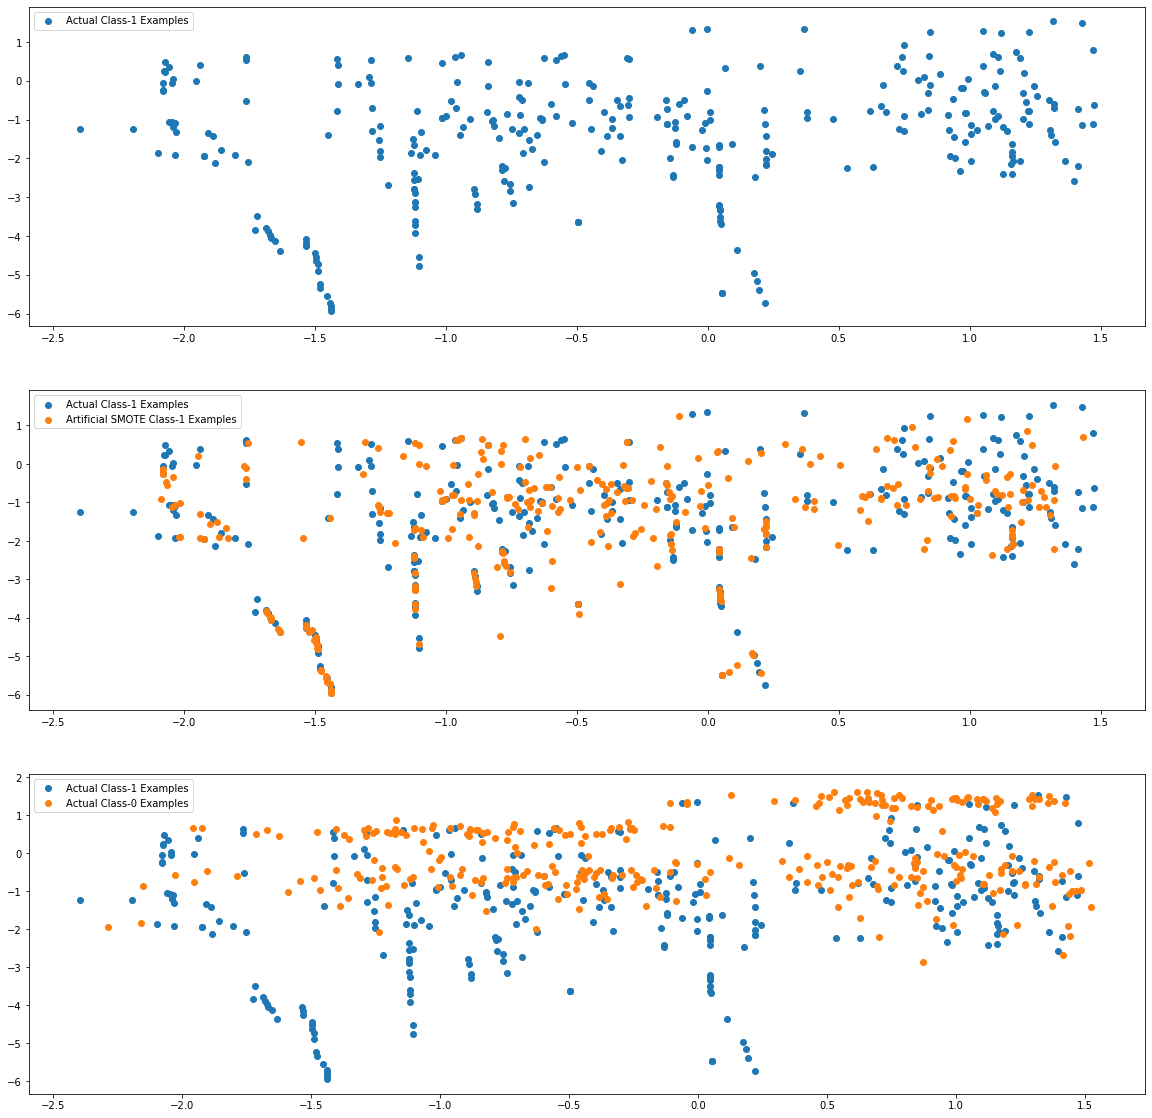

In [29]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train_pt.shape[0]:]

X_train_1 = X_train_pt[np.where(y_train==1.0)]
X_train_0 = X_train_pt[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Logistic Regresssion on on SMOTE

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lgsmt = LogisticRegression()

In [30]:
lgsmt.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [31]:
metrics.confusion_matrix(y_train_smote,lgsmt.predict(X_train_smote))

array([[185265,   5232],
       [ 14616, 175881]], dtype=int64)

In [32]:
metrics.confusion_matrix(y_test,lgsmt.predict(X_test))

array([[91276,  2542],
       [   15,   154]], dtype=int64)

In [33]:
print(metrics.classification_report(y_test,lgsmt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     93818
           1       0.06      0.91      0.11       169

    accuracy                           0.97     93987
   macro avg       0.53      0.94      0.55     93987
weighted avg       1.00      0.97      0.98     93987



In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid_lgsmt = {'C':[0.1,1,10,100]}

In [36]:
grdlgsmt =GridSearchCV(lgsmt,param_grid_lgsmt,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)
grdlgsmt.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc')

In [38]:
dflgsmt = pd.DataFrame(grdlgsmt.cv_results_)
dflgsmt[dflgsmt["mean_train_score"]==dflgsmt["mean_train_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.532612,0.070646,0.085463,0.008487,0.1,{'C': 0.1},0.991812,0.991677,0.991665,0.991718,0.000067,1,0.991637,0.991806,0.991755,0.991733,0.000071


In [39]:
lgsmcv = LogisticRegression(C=0.1) # Fine tuned parameter given by GridSearchCV

In [40]:
lgsmcv.fit(X_train_smote,y_train_smote)

LogisticRegression(C=0.1)

In [41]:
metrics.confusion_matrix(y_test,lgsmcv.predict(X_test))

array([[91291,  2527],
       [   15,   154]], dtype=int64)

In [42]:
print(metrics.classification_report(y_test,lgsmcv.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     93818
           1       0.06      0.91      0.11       169

    accuracy                           0.97     93987
   macro avg       0.53      0.94      0.55     93987
weighted avg       1.00      0.97      0.98     93987



In [44]:
# Setting the theshold probability to optimize specificity and sensitivity of fine tuned model

In [46]:
sen0=[]
sen1=[]

for prob in np.linspace(.001,1,100):
    cf = metrics.confusion_matrix(y_train_smote,lgsmcv.predict_proba(X_train_smote)[:,1]>prob)
    sensitivity0 = cf[0,0]/(cf[0,0]+cf[0,1])
    sensitivity1= cf[1,1]/(cf[1,1]+cf[1,0])
    sen0.append(sensitivity0)
    sen1.append(sensitivity1)

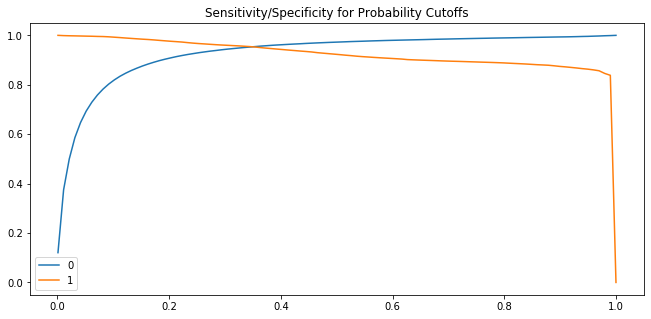

In [47]:
plt.figure(figsize=(11,5))
plt.plot(np.linspace(.001,1,100),sen0,label="0")
plt.plot(np.linspace(.001,1,100),sen1,label="1")
plt.legend()
plt.title("Sensitivity/Specificity for Probability Cutoffs")
plt.show()

In [60]:
print(metrics.classification_report(y_train_smote,lgsmcv.predict_proba(X_train_smote)[:,1]>0.35))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    190497
           1       0.95      0.95      0.95    190497

    accuracy                           0.95    380994
   macro avg       0.95      0.95      0.95    380994
weighted avg       0.95      0.95      0.95    380994



In [61]:
print(metrics.classification_report(y_test,lgsmcv.predict_proba(X_test)[:,1]>0.35))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     93818
           1       0.03      0.91      0.07       169

    accuracy                           0.95     93987
   macro avg       0.52      0.93      0.52     93987
weighted avg       1.00      0.95      0.97     93987



In [62]:
print(metrics.roc_auc_score(y_test,lgsmcv.predict_proba(X_test)[:,1]>0.35))

0.932805850582413


In [63]:
# We are getting same AUC 93 % using SMOTE and Logistic Regression with gridsearch as with class_weight ="balanced"
#Recall of logistic regression in 91 % for fraud cases but precision of prediction if 3%

##### XGBoost on on SMOTE

In [24]:
import xgboost as xgb

In [25]:
xgsmt = xgb.XGBClassifier(random_state=1,learning_rate=0.01)

In [30]:
xgsmt.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print(metrics.confusion_matrix(y_train_smote,xgsmt.predict(X_train_smote)))

[[188278   2219]
 [  3701 186796]]


In [33]:
print(metrics.classification_report(y_test,xgsmt.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     93818
           1       0.12      0.89      0.21       169

    accuracy                           0.99     93987
   macro avg       0.56      0.94      0.60     93987
weighted avg       1.00      0.99      0.99     93987



In [35]:
#Grid Search CV to find best learning rate / parameters of XGBoost

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid_xgsmt = {"learning_rate":[0.001,.01,1]}

In [40]:
gridxsmt = GridSearchCV(xgsmt,param_grid=param_grid_xgsmt,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)

In [41]:
gridxsmt.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=1,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),

In [43]:
dfcvxgsmt = pd.DataFrame(gridxsmt.cv_results_)
dfcvxgsmt[dfcvxgsmt["mean_train_score"]==dfcvxgsmt["mean_train_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,319.272046,53.109517,1.900107,0.368238,1,{'learning_rate': 1},0.999992,0.999999,0.999986,0.999992,0.000005,1,1.0,1.0,1.0,1.0,0.0


In [44]:
#Keeping the learning Rate of 1 as per cv result
xgsmtcv = xgb.XGBClassifier(random_state=1,learning_rate=1)

In [45]:
xgsmtcv.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
print(metrics.classification_report(y_test,xgsmtcv.predict(X_test_pt))) #Better Precision for learning rate 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.77      0.84      0.80       169

    accuracy                           1.00     93987
   macro avg       0.88      0.92      0.90     93987
weighted avg       1.00      1.00      1.00     93987



In [64]:
sen0=[]
sen1=[]

for prob in np.linspace(.001,1,100):
    cf = metrics.confusion_matrix(y_train_smote,xgsmtcv.predict_proba(X_train_smote)[:,1]>prob)
    sensitivity0 = cf[0,0]/(cf[0,0]+cf[0,1])
    sensitivity1= cf[1,1]/(cf[1,1]+cf[1,0])
    sen0.append(sensitivity0)
    sen1.append(sensitivity1)

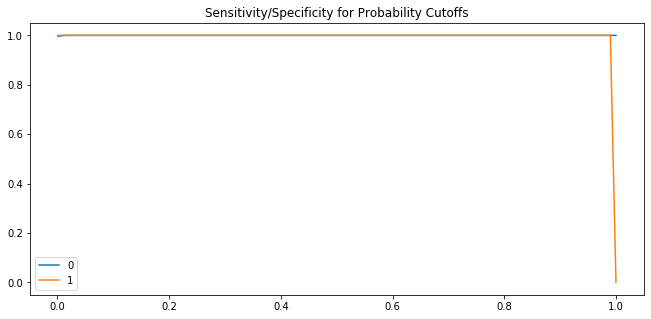

In [65]:
plt.figure(figsize=(11,5))
plt.plot(np.linspace(.001,1,100),sen0,label="0")
plt.plot(np.linspace(.001,1,100),sen1,label="1")
plt.legend()
plt.title("Sensitivity/Specificity for Probability Cutoffs")
plt.show()


In [84]:
print(metrics.classification_report(y_train_smote,xgsmtcv.predict_proba(X_train_smote)[:,1]>0.7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       1.00      1.00      1.00    190497

    accuracy                           1.00    380994
   macro avg       1.00      1.00      1.00    380994
weighted avg       1.00      1.00      1.00    380994



In [88]:
#Setting threshold probaility of 0.7 based on train data to have 83% recall and 80% precison on class 1 / fraud

In [85]:
print(metrics.classification_report(y_test,xgsmtcv.predict_proba(X_test)[:,1]>0.7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.80      0.83      0.82       169

    accuracy                           1.00     93987
   macro avg       0.90      0.92      0.91     93987
weighted avg       1.00      1.00      1.00     93987



In [86]:
print(metrics.confusion_matrix(y_test,xgsmtcv.predict_proba(X_test)[:,1]>0.7))

[[93782    36]
 [   28   141]]


In [87]:
print(metrics.roc_auc_score(y_test,xgsmtcv.predict_proba(X_test)[:,1]>0.7))

0.9169679024766699


##### Random Forest on SMOTE

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfsmt = RandomForestClassifier(n_estimators=100)

In [92]:
rfsmt.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [94]:
print(metrics.classification_report(y_test,rfsmt.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.88      0.80      0.84       169

    accuracy                           1.00     93987
   macro avg       0.94      0.90      0.92     93987
weighted avg       1.00      1.00      1.00     93987



# Cross Validation to find best parameters for RF on SMOTE

In [96]:
param_grid_rfsmt = {'criterion':['gini','entropy'],'n_estimators':[100,150,200],'min_samples_split':[2,4,6]}

In [97]:
gridrfsmt =GridSearchCV(rfsmt,param_grid_rfsmt,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)

In [98]:
gridrfsmt.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='roc_auc')

In [99]:
dfcvrfsmt = pd.DataFrame(gridrfsmt.cv_results_)
dfcvrfsmt[dfcvrfsmt["mean_train_score"]==dfcvrfsmt["mean_train_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,266.444194,3.608672,1.924617,0.046262,gini,2,100,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.999999,0.999992,0.999990,0.999994,3.778139e-06,17,1.0,1.0,1.0,1.0,0.000000e+00
1,409.821555,5.318565,2.983688,0.058415,gini,2,150,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.999998,0.999999,0.999990,0.999996,4.098369e-06,7,1.0,1.0,1.0,1.0,0.000000e+00
2,535.836153,3.618124,3.908604,0.063855,gini,2,200,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.999999,0.999999,0.999990,0.999996,4.123389e-06,6,1.0,1.0,1.0,1.0,6.409876e-17
3,272.431502,3.734163,2.001857,0.050151,gini,4,100,"{'criterion': 'gini', 'min_samples_split': 4, ...",0.999998,0.999999,0.999991,0.999996,3.792513e-06,9,1.0,1.0,1.0,1.0,1.281975e-16
4,435.022745,37.761345,3.872529,1.373138,gini,4,150,"{'criterion': 'gini', 'min_samples_split': 4, ...",0.999998,1.000000,0.999990,0.999996,4.405545e-06,12,1.0,1.0,1.0,1.0,1.281975e-16
5,878.049433,111.209953,7.904383,0.106295,gini,4,200,"{'criterion': 'gini', 'min_samples_split': 4, ...",0.999998,0.999999,0.999997,0.999998,5.476541e-07,2,1.0,1.0,1.0,1.0,0.000000e+00
6,511.869961,4.635328,3.958132,0.127687,gini,6,100,"{'criterion': 'gini', 'min_samples_split': 6, ...",0.999998,0.999999,0.999982,0.999993,8.103952e-06,18,1.0,1.0,1.0,1.0,0.000000e+00
7,766.663261,8.415427,5.891418,0.039533,gini,6,150,"{'criterion': 'gini', 'min_samples_split': 6, ...",0.999998,0.999999,0.999990,0.999996,4.242503e-06,13,1.0,1.0,1.0,1.0,1.281975e-16
8,1015.948958,6.995291,7.832233,0.026253,gini,6,200,"{'criterion': 'gini', 'min_samples_split': 6, ...",0.999998,0.999999,0.999990,0.999996,4.288518e-06,14,1.0,1.0,1.0,1.0,6.409876e-17
9,558.250794,6.353738,3.539752,0.168172,entropy,2,100,"{'criterion': 'entropy', 'min_samples_split': ...",0.999999,0.999992,0.999991,0.999994,3.632116e-06,16,1.0,1.0,1.0,1.0,0.000000e+00


In [100]:
# Rf with best parameteres found in GridSearhCV
clfsm = RandomForestClassifier(n_estimators=200,min_samples_split=4,criterion='entropy')

In [101]:
clfsm.fit(X_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=200)

In [102]:
print(metrics.classification_report(y_train_smote,clfsm.predict(X_train_smote)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       1.00      1.00      1.00    190497

    accuracy                           1.00    380994
   macro avg       1.00      1.00      1.00    380994
weighted avg       1.00      1.00      1.00    380994



In [103]:
print(metrics.classification_report(y_test,clfsm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.90      0.84      0.87       169

    accuracy                           1.00     93987
   macro avg       0.95      0.92      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [104]:
sen0=[]
sen1=[]
for prob in np.linspace(.001,1,100):
    cf = metrics.confusion_matrix(y_train_smote,clfsm.predict_proba(X_train_smote)[:,1]>prob)
    sensitivity0 = cf[0,0]/(cf[0,0]+cf[0,1])
    sensitivity1= cf[1,1]/(cf[1,1]+cf[1,0])
    sen0.append(sensitivity0)
    sen1.append(sensitivity1)

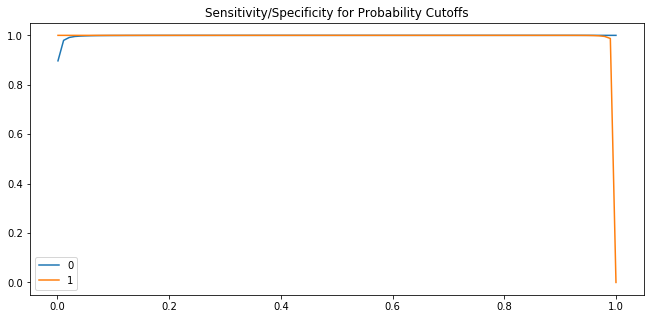

In [105]:
plt.figure(figsize=(11,5))
plt.plot(np.linspace(.001,1,100),sen0,label="0")
plt.plot(np.linspace(.001,1,100),sen1,label="1")
plt.legend()
plt.title("Sensitivity/Specificity for Probability Cutoffs")
plt.show()

In [125]:
print(metrics.classification_report(y_train_smote,clfsm.predict_proba(X_train_smote)[:,1]>.25))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       1.00      1.00      1.00    190497

    accuracy                           1.00    380994
   macro avg       1.00      1.00      1.00    380994
weighted avg       1.00      1.00      1.00    380994



In [126]:
print(metrics.classification_report(y_test,clfsm.predict_proba(X_test)[:,1]>.25))#0.25 is givng better recall and precision

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.74      0.86      0.79       169

    accuracy                           1.00     93987
   macro avg       0.87      0.93      0.90     93987
weighted avg       1.00      1.00      1.00     93987



In [127]:
print(metrics.roc_auc_score(y_test,clfsm.predict_proba(X_test)[:,1]>.25)) #Random Forest is best model with SMOTE as well

0.9287222799879058


### Print the class distribution after applying ADASYN

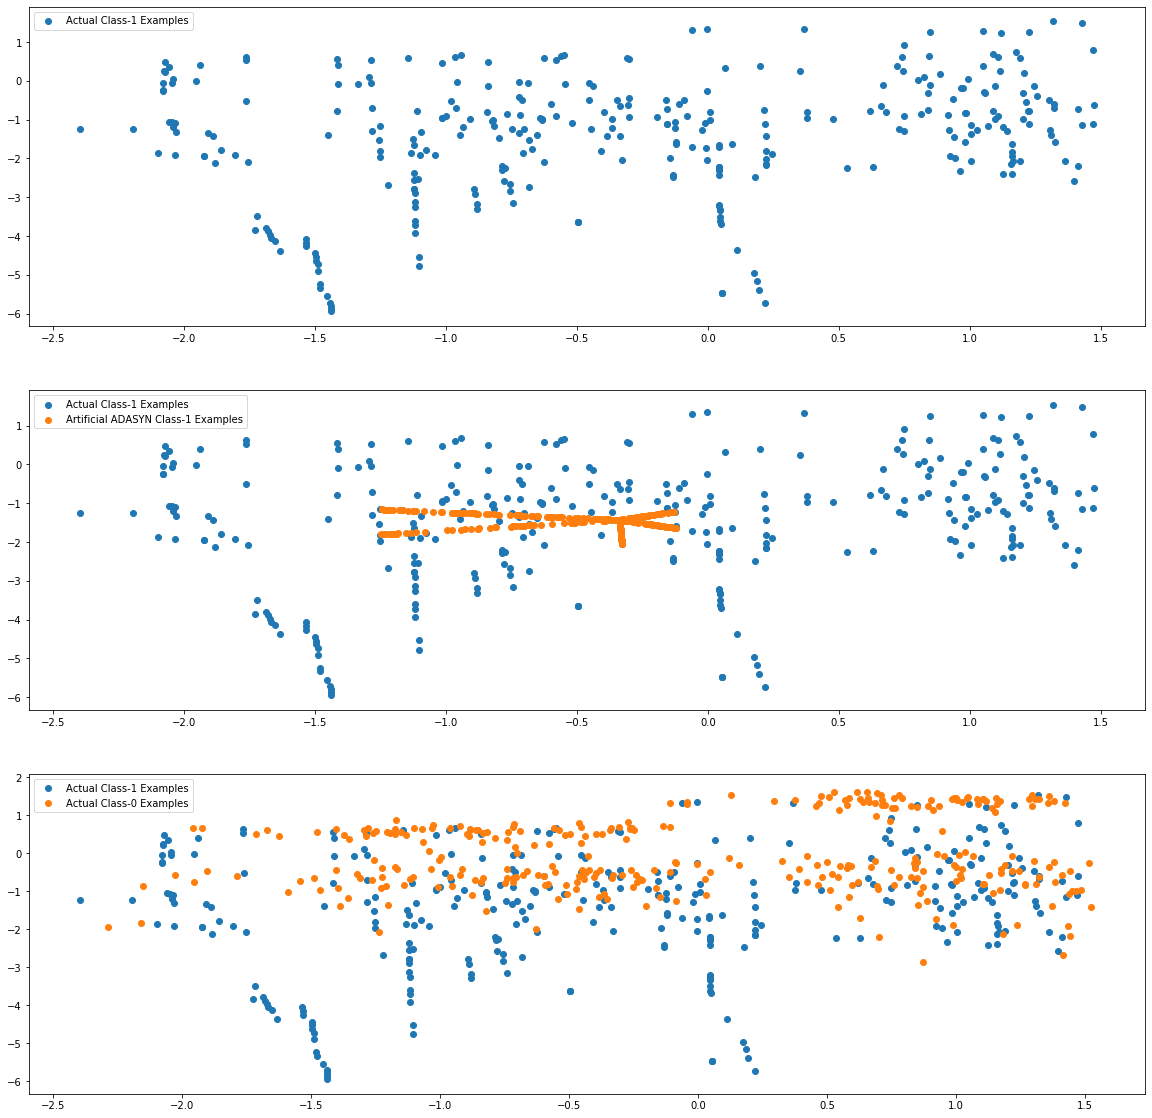

In [128]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train_pt.shape[0]:]

X_train_1 = X_train_pt[np.where(y_train==1.0)]
X_train_0 = X_train_pt[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Learning Logistic Regression on Adasyn

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
logad = LogisticRegression() 

In [135]:
logad.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression()

In [136]:
print(metrics.classification_report(y_train_adasyn,logad.predict(X_train_adasyn)))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91    190497
           1       0.92      0.91      0.91    190493

    accuracy                           0.91    380990
   macro avg       0.91      0.91      0.91    380990
weighted avg       0.91      0.91      0.91    380990



In [137]:
print(metrics.classification_report(y_test,logad.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     93818
           1       0.02      0.93      0.04       169

    accuracy                           0.92     93987
   macro avg       0.51      0.93      0.50     93987
weighted avg       1.00      0.92      0.96     93987



# Cross Validation For logistic Regression on Adasyn

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
param_grid_lgad = {'C':[0.1,1,10,100]}

In [141]:
grdlgad =GridSearchCV(logad,param_grid_lgad,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)

In [143]:
grdlgad.fit(X_train_adasyn,y_train_adasyn)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc')

In [144]:
dflgada = pd.DataFrame(grdlgad.cv_results_)
dflgada[dflgada["mean_train_score"]==dflgada["mean_train_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
3,2.049772,0.325168,0.055154,0.013082,100,{'C': 100},0.969772,0.976072,0.94759,0.964478,0.012215,4,0.971322,0.969668,0.979298,0.973429,0.004205


In [145]:
# taking C=100 as per Cross Validation
logadcv = LogisticRegression(C=100)

In [146]:
logadcv.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression(C=100)

In [151]:
print(metrics.classification_report(y_test,logadcv.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     93818
           1       0.02      0.93      0.04       169

    accuracy                           0.92     93987
   macro avg       0.51      0.93      0.50     93987
weighted avg       1.00      0.92      0.96     93987



In [152]:
sen0=[]
sen1=[]

for prob in np.linspace(.001,1,100):
    cf = metrics.confusion_matrix(y_train_adasyn,logadcv.predict_proba(X_train_adasyn)[:,1]>prob)
    sensitivity0 = cf[0,0]/(cf[0,0]+cf[0,1])
    sensitivity1= cf[1,1]/(cf[1,1]+cf[1,0])
    sen0.append(sensitivity0)
    sen1.append(sensitivity1)

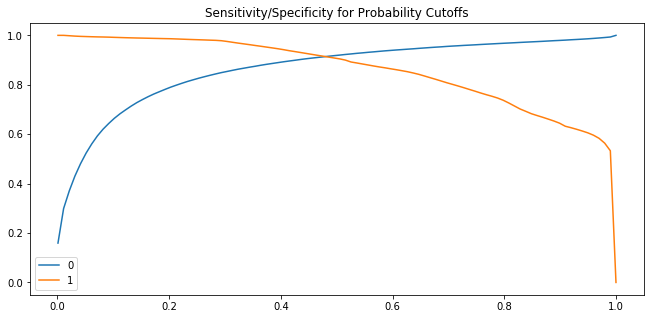

In [153]:
plt.figure(figsize=(11,5))
plt.plot(np.linspace(.001,1,100),sen0,label="0")
plt.plot(np.linspace(.001,1,100),sen1,label="1")
plt.legend()
plt.title("Sensitivity/Specificity for Probability Cutoffs")
plt.show()

In [156]:
print(metrics.classification_report(y_train_adasyn,logadcv.predict_proba(X_train_adasyn)[:,1]>0.44))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92    190497
           1       0.91      0.93      0.92    190493

    accuracy                           0.92    380990
   macro avg       0.92      0.92      0.92    380990
weighted avg       0.92      0.92      0.92    380990



In [157]:
print(metrics.classification_report(y_test,logadcv.predict_proba(X_test_pt)[:,1]>0.44))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     93818
           1       0.02      0.95      0.03       169

    accuracy                           0.90     93987
   macro avg       0.51      0.93      0.49     93987
weighted avg       1.00      0.90      0.95     93987



In [158]:
print(metrics.roc_auc_score(y_test,logadcv.predict_proba(X_test_pt)[:,1]>0.44))

0.9250824743009284


# Learning XGboost on Adasyn

In [159]:
import xgboost as xgb

In [160]:
xgmad = xgb.XGBClassifier(random_state=1)

In [161]:
xgmad.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
print(metrics.classification_report(y_train_adasyn,xgmad.predict(X_train_adasyn)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       1.00      1.00      1.00    190493

    accuracy                           1.00    380990
   macro avg       1.00      1.00      1.00    380990
weighted avg       1.00      1.00      1.00    380990



In [166]:
print(metrics.classification_report(y_test, xgmad.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.75      0.83      0.79       169

    accuracy                           1.00     93987
   macro avg       0.88      0.91      0.89     93987
weighted avg       1.00      1.00      1.00     93987



In [168]:
#cross validation
from sklearn.model_selection import GridSearchCV

In [169]:
param_grid_xgad = {"learning_rate":[0.001,.01,1]}
gridxad = GridSearchCV(xgmad,param_grid=param_grid_xgad,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)

In [170]:
gridxad.fit(X_train_adasyn,y_train_adasyn)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=1,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [171]:
dfcvxgd = pd.DataFrame(gridxad.cv_results_)
dfcvxgd[dfcvxgd["mean_train_score"]==dfcvxgd["mean_train_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,298.850137,42.14699,1.537358,0.216528,1,{'learning_rate': 1},0.982097,0.999908,0.999698,0.993901,0.008347,1,1.0,1.0,1.0,1.0,0.0


In [172]:
xgmadcv = xgb.XGBClassifier(random_state=1,learning_rate=1)

In [175]:
xgmadcv.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
print(metrics.classification_report(y_test,xgmadcv.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.72      0.80      0.76       169

    accuracy                           1.00     93987
   macro avg       0.86      0.90      0.88     93987
weighted avg       1.00      1.00      1.00     93987



In [178]:
sen0=[]
sen1=[]

for prob in np.linspace(.001,1,100):
    cf = metrics.confusion_matrix(y_train,xgmadcv.predict_proba(X_train_pt)[:,1]>prob)
    sensitivity0 = cf[0,0]/(cf[0,0]+cf[0,1])
    sensitivity1= cf[1,1]/(cf[1,1]+cf[1,0])
    sen0.append(sensitivity0)
    sen1.append(sensitivity1)

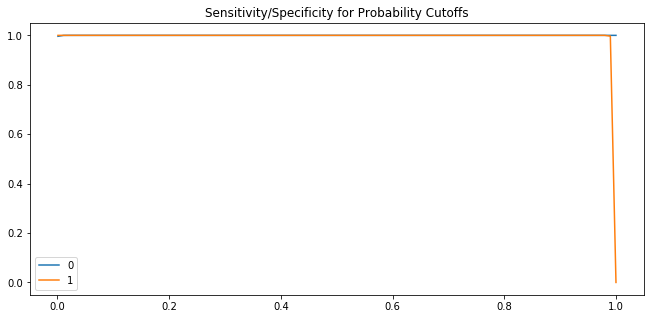

In [179]:
plt.figure(figsize=(11,5))
plt.plot(np.linspace(.001,1,100),sen0,label="0")
plt.plot(np.linspace(.001,1,100),sen1,label="1")
plt.legend()
plt.title("Sensitivity/Specificity for Probability Cutoffs")
plt.show()

In [198]:
print(metrics.classification_report(y_train_adasyn,xgmadcv.predict_proba(X_train_adasyn)[:,1]>0.39))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       1.00      1.00      1.00    190493

    accuracy                           1.00    380990
   macro avg       1.00      1.00      1.00    380990
weighted avg       1.00      1.00      1.00    380990



In [199]:
print(metrics.classification_report(y_test,xgmadcv.predict_proba(X_test_pt)[:,1]>0.39))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.71      0.82      0.76       169

    accuracy                           1.00     93987
   macro avg       0.86      0.91      0.88     93987
weighted avg       1.00      1.00      1.00     93987



In [200]:
print(metrics.roc_auc_score(y_test,xgmadcv.predict_proba(X_test_pt)[:,1]>0.39))

0.907985573477844


# Learning Random Forest on Adasyn

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rfad = RandomForestClassifier(n_estimators=100,random_state=11)

In [204]:
rfad.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(random_state=11)

In [205]:
print(metrics.classification_report(y_train_adasyn,rfad.predict(X_train_adasyn)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       1.00      1.00      1.00    190493

    accuracy                           1.00    380990
   macro avg       1.00      1.00      1.00    380990
weighted avg       1.00      1.00      1.00    380990



In [206]:
print(metrics.classification_report(y_test,rfad.predict(X_test_pt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.86      0.79      0.82       169

    accuracy                           1.00     93987
   macro avg       0.93      0.90      0.91     93987
weighted avg       1.00      1.00      1.00     93987



In [207]:
# Cross Validation on Random Forest and Adasyn
from sklearn.model_selection import GridSearchCV

In [211]:
param_grid_rfad = {'criterion':['gini','entropy'],'n_estimators':[100,150,200],'min_samples_split':[2,4,6]}

In [212]:
gridrfad = GridSearchCV(rfad,param_grid=param_grid_rfad,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)

In [213]:
gridrfad.fit(X_train_adasyn,y_train_adasyn)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=11), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='roc_auc')

In [214]:
dfcvrfad = pd.DataFrame(gridrfad.cv_results_)

dfcvrfad[dfcvrfad["mean_train_score"]==dfcvrfad["mean_train_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,288.484807,6.466037,1.949790,0.011600,gini,2,100,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.987485,0.999922,0.995087,0.994165,0.005119,18,1.0,1.0,1.0,1.0,0.000000e+00
1,433.815960,10.333364,2.989088,0.071303,gini,2,150,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.993820,0.999923,0.996290,0.996678,0.002507,4,1.0,1.0,1.0,1.0,0.000000e+00
2,575.804586,12.932926,3.982777,0.098509,gini,2,200,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.993760,0.999924,0.996968,0.996884,0.002517,3,1.0,1.0,1.0,1.0,0.000000e+00
3,290.010683,6.822312,1.921296,0.028031,gini,4,100,"{'criterion': 'gini', 'min_samples_split': 4, ...",0.989640,0.999924,0.995033,0.994866,0.004200,17,1.0,1.0,1.0,1.0,0.000000e+00
4,434.154206,11.317523,2.926764,0.110135,gini,4,150,"{'criterion': 'gini', 'min_samples_split': 4, ...",0.990681,0.999930,0.996042,0.995551,0.003792,12,1.0,1.0,1.0,1.0,0.000000e+00
5,577.957737,15.471802,3.815449,0.134629,gini,4,200,"{'criterion': 'gini', 'min_samples_split': 4, ...",0.990763,0.999928,0.996599,0.995763,0.003788,8,1.0,1.0,1.0,1.0,0.000000e+00
6,288.838134,7.166218,1.932520,0.029758,gini,6,100,"{'criterion': 'gini', 'min_samples_split': 6, ...",0.989656,0.999921,0.995890,0.995156,0.004223,15,1.0,1.0,1.0,1.0,6.409876e-17
9,336.621292,9.782344,1.706670,0.012696,entropy,2,100,"{'criterion': 'entropy', 'min_samples_split': ...",0.992020,0.999915,0.994997,0.995644,0.003255,10,1.0,1.0,1.0,1.0,0.000000e+00
10,495.264456,13.371155,2.600034,0.017129,entropy,2,150,"{'criterion': 'entropy', 'min_samples_split': ...",0.994137,0.999920,0.996602,0.996886,0.002370,2,1.0,1.0,1.0,1.0,0.000000e+00
11,665.287112,20.422879,3.441802,0.067391,entropy,2,200,"{'criterion': 'entropy', 'min_samples_split': ...",0.994080,0.999919,0.998398,0.997466,0.002473,1,1.0,1.0,1.0,1.0,6.409876e-17


In [215]:
#Model with optimal CV prameters
rfadcv = RandomForestClassifier(n_estimators=200,random_state=11,criterion='entropy',min_samples_split=2)

In [216]:
rfadcv.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=11)

In [218]:
print(metrics.classification_report(y_train_adasyn,rfadcv.predict(X_train_adasyn)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       1.00      1.00      1.00    190493

    accuracy                           1.00    380990
   macro avg       1.00      1.00      1.00    380990
weighted avg       1.00      1.00      1.00    380990



In [219]:
print(metrics.classification_report(y_test,rfadcv.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.89      0.82      0.86       169

    accuracy                           1.00     93987
   macro avg       0.95      0.91      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [221]:
sen0=[]
sen1=[]

for prob in np.linspace(.001,1,100):
    cf = metrics.confusion_matrix(y_train_adasyn,rfadcv.predict_proba(X_train_adasyn)[:,1]>prob)
    sensitivity0 = cf[0,0]/(cf[0,0]+cf[0,1])
    sensitivity1= cf[1,1]/(cf[1,1]+cf[1,0])
    sen0.append(sensitivity0)
    sen1.append(sensitivity1)

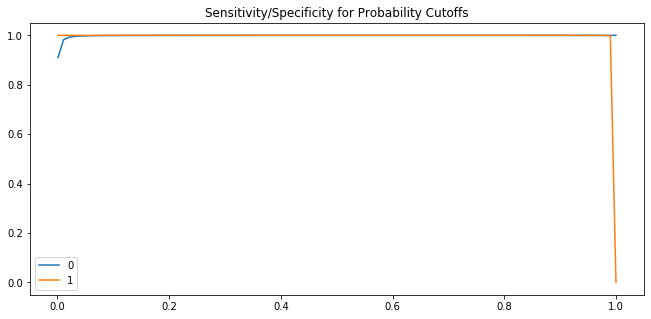

In [222]:
plt.figure(figsize=(11,5))
plt.plot(np.linspace(.001,1,100),sen0,label="0")
plt.plot(np.linspace(.001,1,100),sen1,label="1")
plt.legend()
plt.title("Sensitivity/Specificity for Probability Cutoffs")
plt.show()

In [238]:
print(metrics.classification_report(y_train_adasyn,rfadcv.predict_proba(X_train_adasyn)[:,1]>0.25))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190497
           1       1.00      1.00      1.00    190493

    accuracy                           1.00    380990
   macro avg       1.00      1.00      1.00    380990
weighted avg       1.00      1.00      1.00    380990



In [239]:
print(metrics.classification_report(y_test,rfadcv.predict_proba(X_test)[:,1]>0.25))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.76      0.86      0.81       169

    accuracy                           1.00     93987
   macro avg       0.88      0.93      0.90     93987
weighted avg       1.00      1.00      1.00     93987



In [240]:
print(metrics.roc_auc_score(y_test,rfadcv.predict_proba(X_test)[:,1]>0.25))

0.9287489273263695


### Adasyn and Random Forest has best result of 86 % recall and 76% precision after cross validation


### Print the important features of the best model to understand the dataset

Top var = 5
2nd Top var = 15
3rd Top var = 18


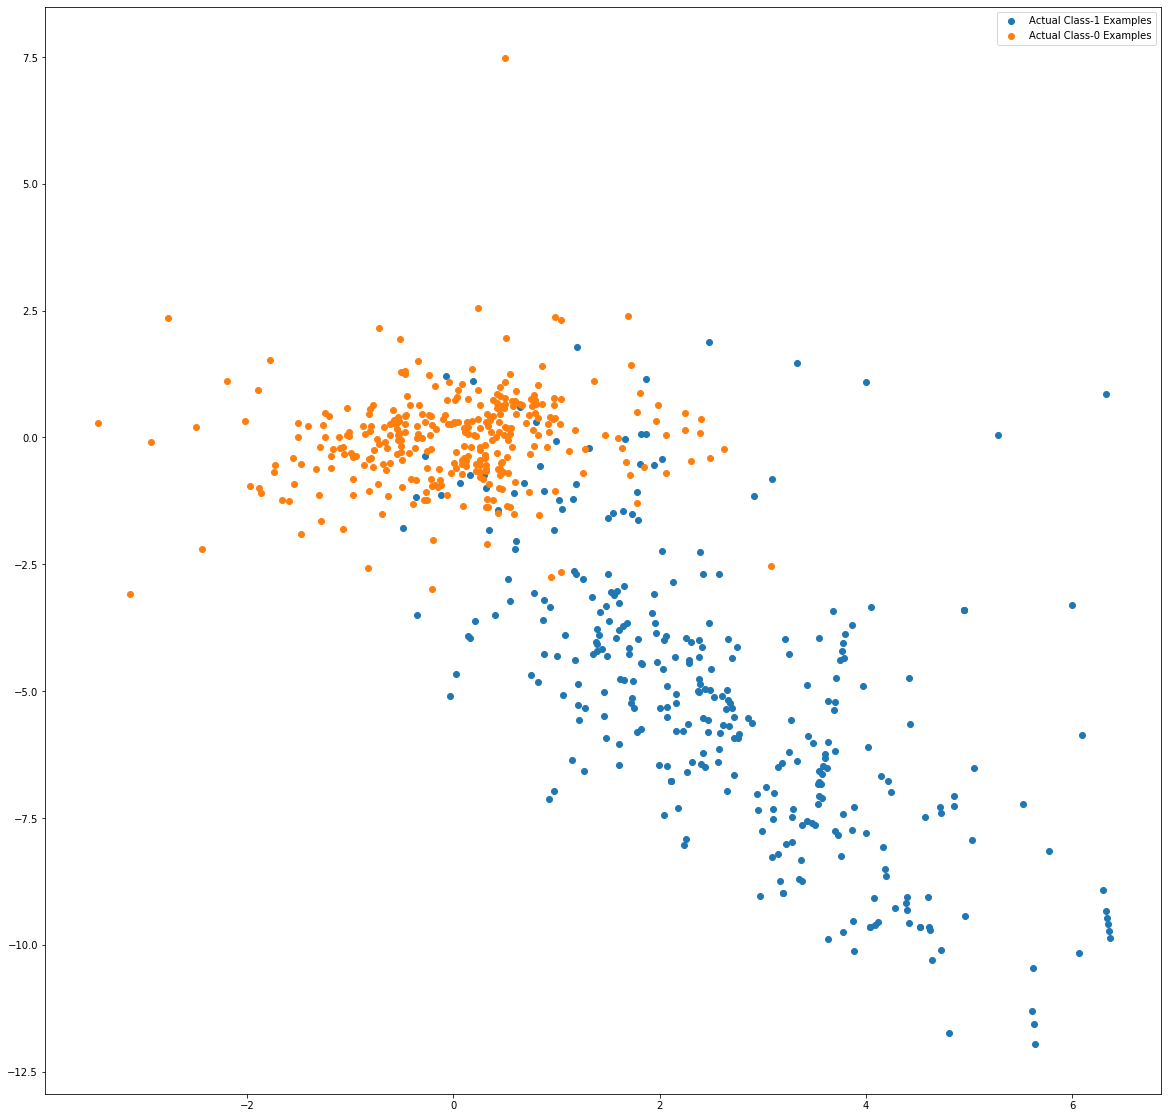

In [241]:
var_imp = []
for i in rfadcv.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfadcv.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfadcv.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfadcv.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rfadcv.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfadcv.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [243]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn,rfadcv.predict_proba(X_train_adasyn)[:,1]>0.25))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn,rfadcv.predict_proba(X_train_adasyn)[:,1]>0.25)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999580045879988
1


In [4]:
# Summary of Results
#-----------------------#
#Without Over Sampling , after cross validation and threshold probability tweaking
#Logistic Regression : Precison =3% and Recall = 93%
#XGboost             : Precison =3% and Recall = 93%
#Random Forest       : Precison =82% and Recall = 85%
#----------------#
#Applying SMOTE , after cross validation and threshold probability tweaking
#----------------#
#Logistic Regression : Precison =3% and Recall = 91%
#XGboost             : Precison =80% and Recall = 83%
#Random Forest       : Precison =74% and Recall = 86%
#-----------------#
#Applying Adasyn , after cross validation and threshold probability tweaking
#-----------------#
#Logistic Regression : Precison =2% and Recall = 90%
#XGboost             : Precison =71% and Recall = 82%
#Random Forest       : Precison =76% and Recall = 86%

# Conclusion: Random Forest using Adasyn has best recall of 86% while keeping precision of 76% for minority class / fraud transactions.Still business metric needs to be considered

In [6]:
#Below are top 3 features based on Random Forest on adasyn with cross validation
#and thresh probability tweaking on train set

#Top var = 5
#2nd Top var = 15
#3rd Top var = 18